## Autoencoder
- 특징을 압축시킨 것
- noise는 패턴이 없는 형태 -> **autoencoder로 제거**
- 이상 탐지

https://www.tensorflow.org/tutorials/generative/autoencoder

- 잠재표현(latent)

https://www.deeplearningbook.org/



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
## 재사용, 재활용 가능!
## closure

latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [4]:
autoencoder1 = Autoencoder(latent_dim) 
autoencoder2 = Autoencoder(latent_dim) 

In [5]:
autoencoder1.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer='adam')
autoencoder2.compile(loss=tf.keras.losses.MeanSquaredError(),optimizer='adam')

In [6]:
autoencoder1.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3142 - val_loss: 0.2863
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2794 - val_loss: 0.2783
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2748 - val_loss: 0.2758
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2731 - val_loss: 0.2749
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2723 - val_loss: 0.2742
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2718 - val_loss: 0.2740
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2715 - val_loss: 0.2737
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2713 - val_loss: 0.2737
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2711 - val_loss: 0.2732
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.270

In [7]:
autoencoder2.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1854/1875 [============================>.] - ETA: 0s - loss: 0.0244

W1028 19:30:45.390159 34616 callbacks.py:328] Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.


1875/1875 [==============================] - 2s 1ms/step - loss: 0.0243 - val_loss: 0.0140
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0120 - val_loss: 0.0109
Epoch 3/10
1875/1875 [==============================] - 2s 967us/step - loss: 0.0104 - val_loss: 0.0100
Epoch 4/10
1875/1875 [==============================] - 2s 940us/step - loss: 0.0097 - val_loss: 0.0096
Epoch 5/10
1875/1875 [==============================] - 1s 787us/step - loss: 0.0094 - val_loss: 0.0094
Epoch 6/10
1875/1875 [==============================] - 1s 793us/step - loss: 0.0092 - val_loss: 0.0093
Epoch 7/10
1875/1875 [==============================] - 2s 819us/step - loss: 0.0091 - val_loss: 0.0091
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 9/10
1875/1875 [==============================] - 2s 918us/step - loss: 0.0089 - val_loss: 0.0089
Epoch 10/10
1875/1875 [==============================] - 2s 965us/step - loss: 0.

절대적 실수 오차 : 숫자가 적다고 좋은 loss X

## noise 제거

In [14]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

In [23]:
autoencoder3 = Autoencoder(latent_dim)
autoencoder3.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer='adam')


In [24]:
autoencoder3.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3228 - val_loss: 0.2979
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2898 - val_loss: 0.2885
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2842 - val_loss: 0.2853
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2824 - val_loss: 0.2842
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2815 - val_loss: 0.2836
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2810 - val_loss: 0.2830
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2804 - val_loss: 0.2827
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2802 - val_loss: 0.2825
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2800 - val_loss: 0.2823
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.279

In [25]:
encoded_imgs = autoencoder3.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder3.decoder(encoded_imgs).numpy()

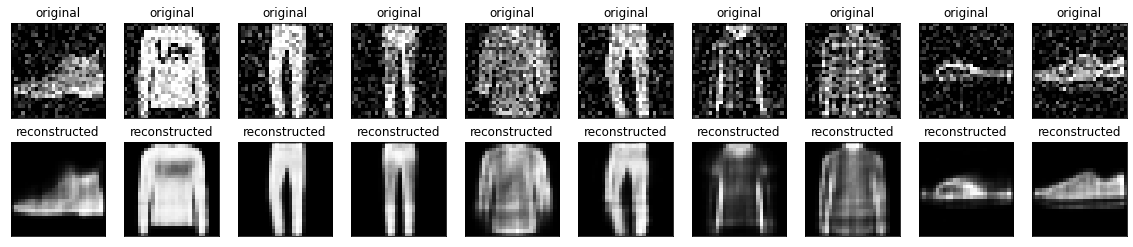

In [26]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test_noisy[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [27]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)), 
      layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
        # stride로 크기 줄이기
      layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])
    
    self.decoder = tf.keras.Sequential([
        # Conv2DTranspose : Convolution을 거꾸로 복원
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

pooling 대신에 stride이용해서 sampling

Upsampling : resize하는 방식
    - matching이 안된다.
Conv2DTranspose : 학습을 통해서 복원, Conv2D 반대 과정

- 작은 것에서 큰 것을 맞추려면 완전히 맞추기 힘들다

**DeConvolution** : Convolution 가정을 반대로

https://github.com/vdumoulin/conv_arithmetic

- Dilated convolution 
    - 팽창시키기 -> generating
    - segmentation

In [29]:
x_train_noisy = x_train_noisy[..., tf.newaxis]
x_test_noisy = x_test_noisy[..., tf.newaxis]

In [30]:
autoencoder.compile(loss=tf.keras.losses.MeanSquaredError(),optimizer='adam')
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0181 - val_loss: 0.0112
Epoch 2/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0105 - val_loss: 0.0102
Epoch 3/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0096 - val_loss: 0.0093
Epoch 4/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0089 - val_loss: 0.0088
Epoch 5/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0087 - val_loss: 0.0086
Epoch 6/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0086 - val_loss: 0.0087
Epoch 7/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0085 - val_loss: 0.0084
Epoch 8/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0084 - val_loss: 0.0083
Epoch 9/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0083 - val_loss: 0.0082
Epoch 10/10
1875/1875 [==============================] - 43s 23m

In [31]:
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

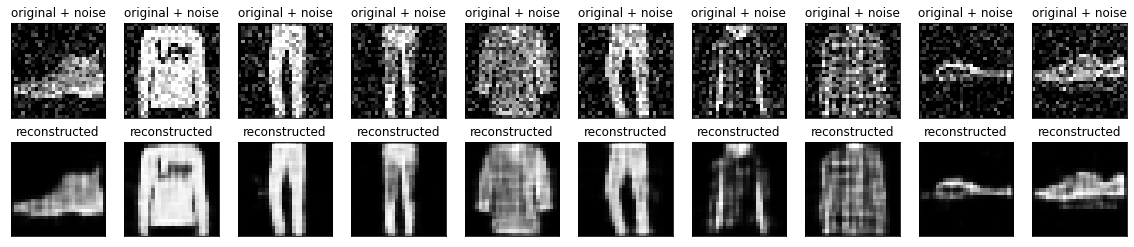

In [32]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

PRML(Pattern Recognition & Machine Learning)

- VAE 잘 나와 있음

<br>

https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.96682&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

SVM에서 kernel trick을 제외하고 차원 늘리는 것에 대한 것은 없음

<br>

## GAN

### idea
- 위조 지폐와 경찰
- 위조 지폐를 변형해서 경찰을 속일 만한 데이터를 만들 수 있다
- 동시에 경찰의 감별 능력도 늘게 만듬. 이전에 아닌 것도 위조 지폐라고 함.

#### adversial 
- self-suprevised learning
- GAN은 학습이 잘 안됨.(under fitting문제) -> 학습 테크닉 중요

NIPS 2016 Tutorial: Generative Adversarial Networks

### Cherry-Picked
- 선별적으로 결과를 뽑음. -> 재현 불가능한 문제


사기 치는 거 : Generater

잡는 거 : Discriminator

- 처음에 Generater의 능력만 키우기

In [74]:
# 200개만 받아서 mnist만들기

generator = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, input_shape=(200,),activation='relu'),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(784,activation='relu'),
])

# 학습 전략 따로

generator.compile(loss='binary_crossentropy', optimizer='adam')

In [42]:
# 784개 받고 진짜인지 가짜인지 판별

discriminator = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1024, input_shape=(784,),activation='relu'),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

discriminator.compile(loss='binary_crossentropy', optimizer='adam')

In [44]:
# generator만 학습

discriminator.trainable = False

In [45]:
gan_input = tf.keras.Input(shape=(200,))
x = generator(gan_input)
gan_output = discriminator(x)

gan = tf.keras.models.Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')

In [46]:
gan.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
sequential_22 (Sequential)   (None, 784)               585232    
_________________________________________________________________
sequential_23 (Sequential)   (None, 1)                 1460225   
Total params: 2,045,457
Trainable params: 585,232
Non-trainable params: 1,460,225
_________________________________________________________________


In [47]:
sample = np.random.random((5,200))
generator(sample)

<tf.Tensor: shape=(5, 784), dtype=float32, numpy=
array([[0.03465973, 0.        , 0.06351185, ..., 0.        , 0.        ,
        0.04446098],
       [0.18621269, 0.        , 0.        , ..., 0.        , 0.03281298,
        0.        ],
       [0.        , 0.        , 0.1282712 , ..., 0.        , 0.        ,
        0.        ],
       [0.07062371, 0.        , 0.09372175, ..., 0.03057003, 0.        ,
        0.        ],
       [0.04494633, 0.17188662, 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)>

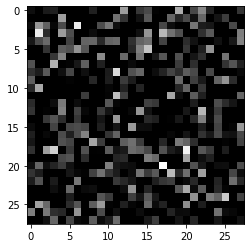

In [49]:
# 가짜 생성

plt.imshow(generator(sample)[0].numpy().reshape(28,28))

In [50]:
discriminator(generator(sample))

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[0.5292832 ],
       [0.5197771 ],
       [0.5167295 ],
       [0.52094054],
       [0.524792  ]], dtype=float32)>

In [57]:
# 100개까지만 가짜 만들고 그 이후로 진짜
# fit을 쓰면 전체가 다 학습됨 - > train on batch

(x_train, y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1,28*28)

In [58]:
batch_size = x_train.shape[0] // 128  # 정수만들기

In [59]:
# 가짜 데이터
fake = np.random.normal(0,1,size=[batch_size,200])
# 200개가 batch만큼 있음

In [60]:
# 468개 실제
image_batch = x_train[np.random.randint(0, x_train.shape[0],size = batch_size)]
image_batch.shape

(468, 784)

In [61]:
# 학습 데이터 구축

x = np.concatenate([image_batch,generator(fake)])

In [63]:
y = np.zeros(2 * batch_size)
y[:batch_size] = 1 # 진짜 가짜 라벨링

In [64]:
# 학습

discriminator.trainable = True

In [65]:
discriminator.train_on_batch(x,y)

7.565319061279297

In [67]:
discriminator.train_on_batch(x,y)

0.00993646215647459

In [68]:
# 어느 정도 되면 학습 안시킴

discriminator.trainable = False

In [71]:
# 실제 데이터
y_gen = np.ones(batch_size)

In [90]:
generator.train_on_batch(fake,y_gen)

0.100542351603508

위의 과정 계속 반복

나중에 거의 진짜처럼 만들 수 있음

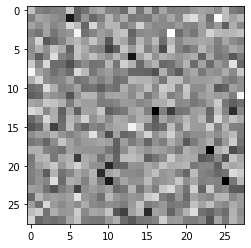

In [91]:
plt.imshow(generator(sample)[0].numpy().reshape(28,28))

- 거의 몇 천번 해야 된다.
- relu도 문제가 됨
    - 학습이 잘 안됨 -> 한 번 0이면 계속 0으로 전달
    
-> activation으로 **leaky relu**

https://www.tensorflow.org/tutorials/generative/dcgan

여기서 leaky 사용